In [1]:
# set data path and download data

import wget
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv'
wget.download(data_url)

100% [..........................................................................] 2010492 / 2010492

'pollution.csv'

- [Data Source](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data#)

In [1]:
# read first few lines of data
import csv
data_path = 'pollution.csv'

count = 0
with open(data_path, 'r') as file:
    data = csv.reader(file)
    
    for row in data:
        if count >= 5 :
            break
        else:
            print(row)
            count+=1
    

['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']
['1', '2010', '1', '1', '0', 'NA', '-21', '-11', '1021', 'NW', '1.79', '0', '0']
['2', '2010', '1', '1', '1', 'NA', '-21', '-12', '1020', 'NW', '4.92', '0', '0']
['3', '2010', '1', '1', '2', 'NA', '-21', '-11', '1019', 'NW', '6.71', '0', '0']
['4', '2010', '1', '1', '3', 'NA', '-21', '-14', '1019', 'NW', '9.84', '0', '0']


In [2]:
## check data
import pandas as pd
df = pd.read_csv(data_path)

df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,43824.0,21912.500000,12651.043435,1.00,10956.75,21912.50,32868.25,43824.0
year,43824.0,2012.000000,1.413842,2010.00,2011.00,2012.00,2013.00,2014.0
month,43824.0,6.523549,3.448572,1.00,4.00,7.00,10.00,12.0
day,43824.0,15.727820,8.799425,1.00,8.00,16.00,23.00,31.0
hour,43824.0,11.500000,6.922266,0.00,5.75,11.50,17.25,23.0
pm2.5,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.0
DEWP,43824.0,1.817246,14.433440,-40.00,-10.00,2.00,15.00,28.0
TEMP,43824.0,12.448521,12.198613,-19.00,2.00,14.00,23.00,42.0
PRES,43824.0,1016.447654,10.268698,991.00,1008.00,1016.00,1025.00,1046.0
Iws,43824.0,23.889140,50.010635,0.45,1.79,5.37,21.91,585.6


In [5]:
null_index = df[df['pm2.5'].isnull()].index
print(null_index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            43283, 43544, 43545, 43546, 43547, 43548, 43549, 43550, 43551,
            43552],
           dtype='int64', length=2067)


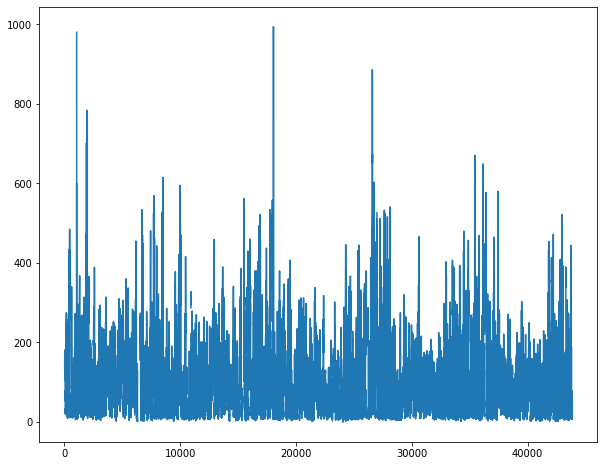

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(df['pm2.5'])
plt.show()

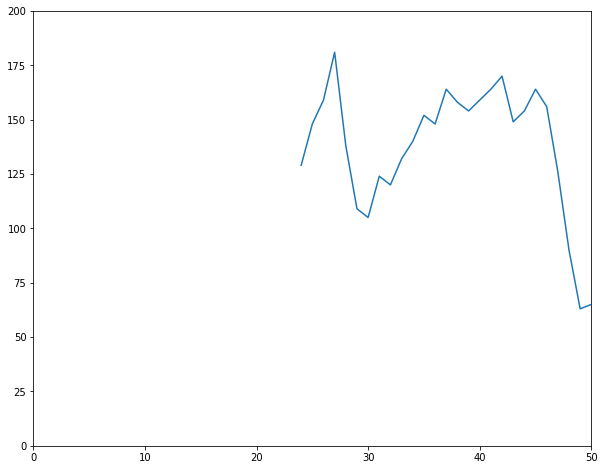

In [8]:
plt.figure(figsize=(10,8))
plt.plot(df['pm2.5'])
plt.axis([0,50, 0, 200])
plt.show()

In [9]:
df.head(25)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


- Seems first 24 row values doesnt have 'pm2.5' values, we'll just remove these rows and rest will fill up with 0

In [11]:
df = df.iloc[24:, :]
df.fillna(0, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43800 non-null  int64  
 1   year    43800 non-null  int64  
 2   month   43800 non-null  int64  
 3   day     43800 non-null  int64  
 4   hour    43800 non-null  int64  
 5   pm2.5   43800 non-null  float64
 6   DEWP    43800 non-null  int64  
 7   TEMP    43800 non-null  float64
 8   PRES    43800 non-null  float64
 9   cbwd    43800 non-null  object 
 10  Iws     43800 non-null  float64
 11  Is      43800 non-null  int64  
 12  Ir      43800 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [13]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

- For simplicity, we'll remove the columns ['No', 'year', 'month', 'day', 'hour', 'cbwd']
- can include cbwd, but will need to encode it into a numeric data

In [20]:
filtered_data = df[['pm2.5', 'DEWP', 'TEMP', 'PRES','Iws', 'Is', 'Ir']]
filtered_data.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0


## Scaling and preparing the input data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
filtered_data = scaler.fit_transform(filtered_data)

In [26]:
filtered_data[:5]

array([[0.12977867, 0.35294118, 0.24590164, 0.52727273, 0.00229001,
        0.        , 0.        ],
       [0.14889336, 0.36764706, 0.24590164, 0.52727273, 0.00381099,
        0.        , 0.        ],
       [0.15995976, 0.42647059, 0.2295082 , 0.54545455, 0.00533197,
        0.        , 0.        ],
       [0.18209256, 0.48529412, 0.2295082 , 0.56363636, 0.00839101,
        0.03703704, 0.        ],
       [0.138833  , 0.48529412, 0.2295082 , 0.56363636, 0.00991199,
        0.07407407, 0.        ]])

In [27]:
# check the shape
filtered_data.shape

(43800, 7)

- I'll just use 2500 rows of data to train and test this data
- I'll use 2000 rows of data for training and remaining for validation

In [30]:
input_data = filtered_data[:2500, :]
input_data.shape

(2500, 7)

### Plot and check the distribution for the target variable

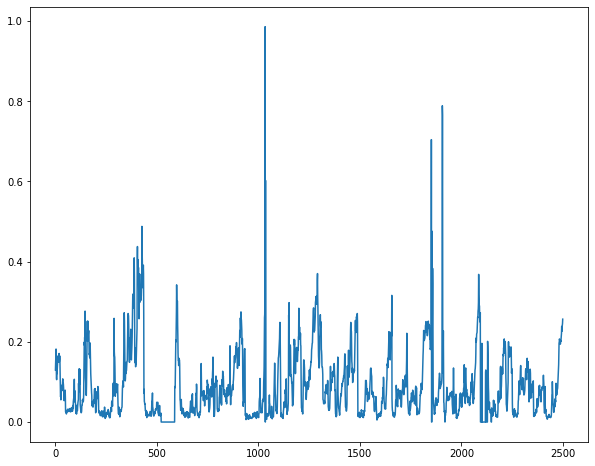

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(input_data[:, 0])
plt.show()

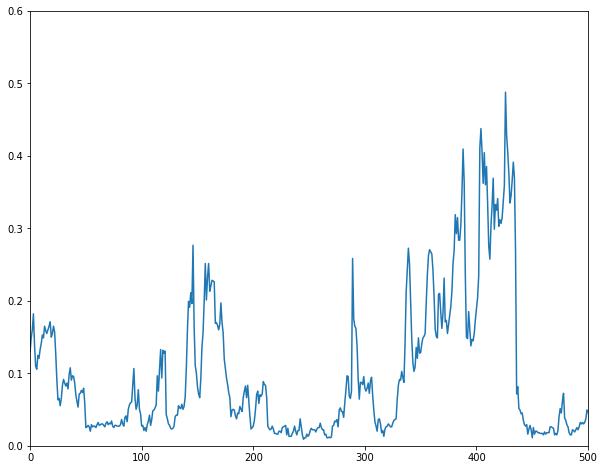

In [38]:
plt.figure(figsize=(10, 8))
plt.plot(input_data[:, 0])
plt.axis([0, 500, 0, 0.6])
plt.show()

In [32]:
import numpy as np

split_time = 2000

train_series = input_data[:split_time]
valid_series = input_data[split_time:]

# set train and test time series
train_time = range(split_time)
print(len(train_time))

valid_time = np.array(range(split_time, (split_time + (len(input_data) - split_time))))
print(len(valid_time))

2000
500


### function to generate train and test data

In [43]:
import tensorflow as tf

In [33]:
def generate_windowed_datasets(series, batch_size, buffer_size, window_size):
    
    datasets = tf.data.Dataset.from_tensor_slices(series)
    datasets = datasets.window(size=window_size + 1, shift = 1, drop_remainder=True)
    datasets = datasets.flat_map(lambda window: window.batch(window_size + 1))
    
    # splitting up into features and labels
    datasets = datasets.map(lambda w : (w[:-1], w[-1][0]))
    datasets = datasets.shuffle(buffer_size=buffer_size)
    datasets = datasets.batch(batch_size=batch_size).prefetch(1)
    return datasets    

In [40]:
# define hyper parameters

WINDOW_SIZE = 96
BUFFER_SIZE = 2000
BATCH_SIZE = 128

In [44]:
# create train and valid datasets

train_dataset = generate_windowed_datasets(train_series, BATCH_SIZE, BUFFER_SIZE, WINDOW_SIZE)

# check data in train_dataset

for data in train_dataset.take(1):
    print('Type: {}'.format(type(data)))
    print('length :{}'.format(len(data)))
    print('Feature Shape : {}'.format(data[0].shape))
    print('Label : {}'.format(data[1].shape))

Type: <class 'tuple'>
length :2
Feature Shape : (128, 96, 7)
Label : (128,)


### Create Model

In [45]:
model = tf.keras.models.Sequential([
    
    #tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis = 0),  input_shape = [None, 2]),
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape = (WINDOW_SIZE, 7)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 96, 64)            18432     
                                                                 
 lstm_1 (LSTM)               (None, 96, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 84,545
Trainable params: 84,545
Non-trainable params: 0
_________________________________________________________________


In [46]:
## store the initial weights

init_weights = model.get_weights()

In [47]:
#tf.keras.backend.clear_session()

## set up the learning rate parameter
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10 ** (epoch/20))

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9),
             loss=tf.keras.losses.Huber(),
             metrics = ['mae'])

num_epochs = 100

# fit the model
history = model.fit(train_dataset, epochs=num_epochs, callbacks=[lr_schedule])

Epoch 1/100
15/15 [==============================] - 27s 847ms/step - loss: 0.0146 - mae: 0.1441 - lr: 0.0010
Epoch 2/100
15/15 [==============================] - 11s 625ms/step - loss: 0.0055 - mae: 0.0692 - lr: 0.0011
Epoch 3/100
15/15 [==============================] - 11s 627ms/step - loss: 0.0039 - mae: 0.0667 - lr: 0.0013
Epoch 4/100
15/15 [==============================] - 10s 620ms/step - loss: 0.0039 - mae: 0.0683 - lr: 0.0014
Epoch 5/100
15/15 [==============================] - 11s 638ms/step - loss: 0.0039 - mae: 0.0650 - lr: 0.0016
Epoch 6/100
15/15 [==============================] - 11s 639ms/step - loss: 0.0038 - mae: 0.0641 - lr: 0.0018
Epoch 7/100
15/15 [==============================] - 11s 628ms/step - loss: 0.0038 - mae: 0.0636 - lr: 0.0020
Epoch 8/100
15/15 [==============================] - 11s 645ms/step - loss: 0.0038 - mae: 0.0638 - lr: 0.0022
Epoch 9/100
15/15 [==============================] - 11s 656ms/step - loss: 0.0038 - mae: 0.0636 - lr: 0.0025
Epoch 10/1

Epoch 75/100
15/15 [==============================] - 11s 667ms/step - loss: 42.0338 - mae: 42.5337 - lr: 5.0119
Epoch 76/100
15/15 [==============================] - 11s 698ms/step - loss: 52.6337 - mae: 53.1337 - lr: 5.6234
Epoch 77/100
15/15 [==============================] - 11s 692ms/step - loss: 55.2709 - mae: 55.7709 - lr: 6.3096
Epoch 78/100
15/15 [==============================] - 11s 679ms/step - loss: 158.3967 - mae: 158.8967 - lr: 7.0795
Epoch 79/100
15/15 [==============================] - 11s 685ms/step - loss: 66.0268 - mae: 66.5261 - lr: 7.9433
Epoch 80/100
15/15 [==============================] - 12s 707ms/step - loss: 83.7138 - mae: 84.1895 - lr: 8.9125
Epoch 81/100
15/15 [==============================] - 10s 605ms/step - loss: 138.8573 - mae: 139.3477 - lr: 10.0000
Epoch 82/100
15/15 [==============================] - 6s 375ms/step - loss: 269.1001 - mae: 269.6001 - lr: 11.2202
Epoch 83/100
15/15 [==============================] - 143s 10s/step - loss: 230.3993 - ma

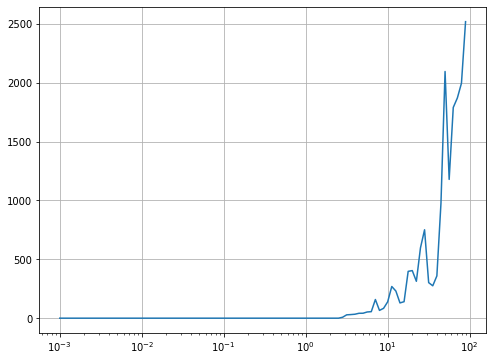

In [53]:
metrics = pd.DataFrame(history.history)

plt.figure(figsize=(8,6))
plt.semilogx(metrics['lr'], metrics['loss'])
plt.grid(True)
plt.show()

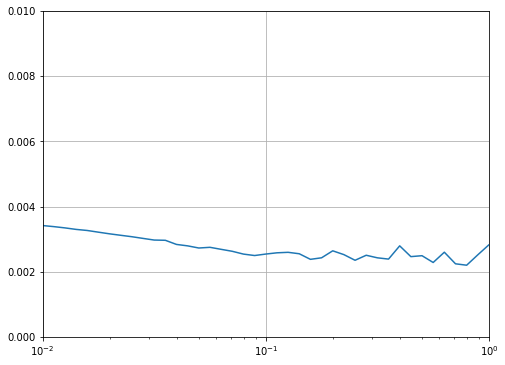

In [51]:
plt.figure(figsize=(8,6))
plt.semilogx(metrics['lr'], metrics['loss'])
plt.grid(True)
plt.axis([1e-2, 1, 0, 0.01])
plt.show()

In [52]:
# clear session
model.set_weights(init_weights)
tf.keras.backend.clear_session()

## set up the learning rate parameter

#lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-2 * 10 ** (epoch/20))
# set leraning rate
learning_rate = 1e-1

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
             loss=tf.keras.losses.Huber(),
             metrics = ['mae'])

# fit the model
model.fit(train_dataset, epochs=100)

Epoch 1/100
15/15 [==============================] - 21s 670ms/step - loss: 0.0075 - mae: 0.0973
Epoch 2/100
15/15 [==============================] - 12s 697ms/step - loss: 0.0040 - mae: 0.0632
Epoch 3/100
15/15 [==============================] - 12s 728ms/step - loss: 0.0034 - mae: 0.0603
Epoch 4/100
15/15 [==============================] - 12s 714ms/step - loss: 0.0032 - mae: 0.0559
Epoch 5/100
15/15 [==============================] - 12s 709ms/step - loss: 0.0030 - mae: 0.0531
Epoch 6/100
15/15 [==============================] - 12s 702ms/step - loss: 0.0029 - mae: 0.0527
Epoch 7/100
15/15 [==============================] - 10s 592ms/step - loss: 0.0028 - mae: 0.0515
Epoch 8/100
15/15 [==============================] - 11s 665ms/step - loss: 0.0027 - mae: 0.0495
Epoch 9/100
15/15 [==============================] - 10s 613ms/step - loss: 0.0026 - mae: 0.0482
Epoch 10/100
15/15 [==============================] - 10s 647ms/step - loss: 0.0025 - mae: 0.0475
Epoch 11/100
15/15 [=========

15/15 [==============================] - 7s 430ms/step - loss: 0.0019 - mae: 0.0387
Epoch 86/100
15/15 [==============================] - 7s 452ms/step - loss: 0.0019 - mae: 0.0399
Epoch 87/100
15/15 [==============================] - 7s 439ms/step - loss: 0.0019 - mae: 0.0400
Epoch 88/100
15/15 [==============================] - 8s 508ms/step - loss: 0.0019 - mae: 0.0391
Epoch 89/100
15/15 [==============================] - 7s 478ms/step - loss: 0.0019 - mae: 0.0385
Epoch 90/100
15/15 [==============================] - 7s 455ms/step - loss: 0.0018 - mae: 0.0381
Epoch 91/100
15/15 [==============================] - 7s 428ms/step - loss: 0.0018 - mae: 0.0377
Epoch 92/100
15/15 [==============================] - 6s 410ms/step - loss: 0.0018 - mae: 0.0375
Epoch 93/100
15/15 [==============================] - 7s 425ms/step - loss: 0.0018 - mae: 0.0378
Epoch 94/100
15/15 [==============================] - 7s 419ms/step - loss: 0.0019 - mae: 0.0396
Epoch 95/100
15/15 [=======================

In [54]:
# plot loss and accuracy values 
def plot_metrics(df, num_epochs):
	
	epoch_range = range(num_epochs)
	plt.figure(figsize=(8,6))
	plt.plot(epoch_range, df['loss'], label = 'training_loss')
	plt.plot(epoch_range, df['mae'], label = 'mae')
# 	plt.plot(epoch_range, df['accuracy'], label = 'training_accuracy')
# 	plt.plot(epoch_range, df['val_accuracy'], label = 'validation_accuracy')
	plt.legend(loc='best')
	plt.show()

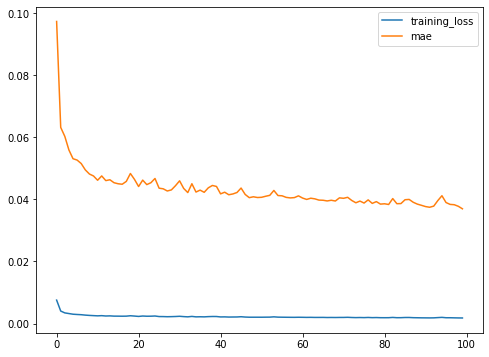

In [55]:
history = pd.DataFrame(model.history.history)
plot_metrics(history, 100)

### prepare validation data and predict

In [56]:
# function to generate validation data and predict on it 
def prediction(model, series, batch_size, window_size):
    
    datasets = tf.data.Dataset.from_tensor_slices(series)
    datasets = datasets.window(size=window_size, shift = 1, drop_remainder=True)
    datasets = datasets.flat_map(lambda window: window.batch(window_size))
    datasets = datasets.batch(batch_size=batch_size).prefetch(1)
    
    prediction = model.predict(datasets)
    return prediction

In [58]:
## generate forecast data

forecast_data = input_data[split_time-WINDOW_SIZE:-1]
predictions = prediction(model, forecast_data, BATCH_SIZE, WINDOW_SIZE)

results = predictions.squeeze()
print(results.shape)

4/4 [==============================] - 2s 167ms/step
(500,)


In [65]:
# get true results
# these are the average price values that are in the 2nd column of every data item

true_values = valid_series[:, 0]
true_values.shape

(500,)

### Evaluation Metrics

In [66]:
print('Mean Squared error :{}'.format(tf.metrics.mean_squared_error(true_values, results)))
print('Mean Absolute error :{}'.format(tf.metrics.mean_absolute_error(true_values, results)))

Mean Squared error :0.0027370948810130358
Mean Absolute error :0.03796926885843277


In [61]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

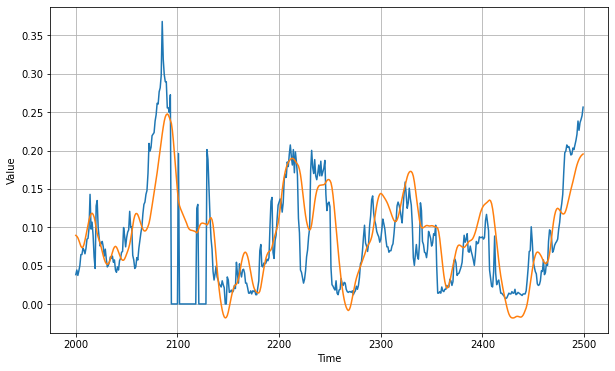

In [67]:
plot_series(valid_time, (true_values, results))

## with Adam Optimizer

In [63]:
model_adam = tf.keras.models.Sequential([
    
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis = 0),  input_shape = [None, 2]),
    tf.keras.layers.LSTM(64, return_sequences=True ,input_shape = (WINDOW_SIZE, 7)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

model_adam.compile(optimizer='adam',
                  loss=tf.keras.losses.Huber(),
                  metrics=['mae'])

model_adam.fit(train_dataset, epochs=num_epochs)

Epoch 1/100
15/15 [==============================] - 10s 356ms/step - loss: 0.0052 - mae: 0.0735
Epoch 2/100
15/15 [==============================] - 6s 361ms/step - loss: 0.0029 - mae: 0.0528
Epoch 3/100
15/15 [==============================] - 6s 370ms/step - loss: 0.0024 - mae: 0.0461
Epoch 4/100
15/15 [==============================] - 7s 417ms/step - loss: 0.0022 - mae: 0.0433
Epoch 5/100
15/15 [==============================] - 8s 512ms/step - loss: 0.0021 - mae: 0.0411
Epoch 6/100
15/15 [==============================] - 7s 459ms/step - loss: 0.0020 - mae: 0.0401
Epoch 7/100
15/15 [==============================] - 7s 410ms/step - loss: 0.0019 - mae: 0.0391
Epoch 8/100
15/15 [==============================] - 7s 443ms/step - loss: 0.0019 - mae: 0.0380
Epoch 9/100
15/15 [==============================] - 7s 427ms/step - loss: 0.0018 - mae: 0.0367
Epoch 10/100
15/15 [==============================] - 6s 400ms/step - loss: 0.0017 - mae: 0.0355
Epoch 11/100
15/15 [==================

15/15 [==============================] - 8s 489ms/step - loss: 8.5945e-04 - mae: 0.0200
Epoch 85/100
15/15 [==============================] - 7s 457ms/step - loss: 8.1782e-04 - mae: 0.0186
Epoch 86/100
15/15 [==============================] - 8s 483ms/step - loss: 8.2137e-04 - mae: 0.0200
Epoch 87/100
15/15 [==============================] - 7s 470ms/step - loss: 8.2741e-04 - mae: 0.0195
Epoch 88/100
15/15 [==============================] - 7s 467ms/step - loss: 7.8575e-04 - mae: 0.0190
Epoch 89/100
15/15 [==============================] - 7s 410ms/step - loss: 7.9194e-04 - mae: 0.0197
Epoch 90/100
15/15 [==============================] - 7s 411ms/step - loss: 8.2745e-04 - mae: 0.0183
Epoch 91/100
15/15 [==============================] - 7s 435ms/step - loss: 7.7308e-04 - mae: 0.0180
Epoch 92/100
15/15 [==============================] - 6s 407ms/step - loss: 7.4773e-04 - mae: 0.0181
Epoch 93/100
15/15 [==============================] - 6s 404ms/step - loss: 7.3270e-04 - mae: 0.0182
Epo

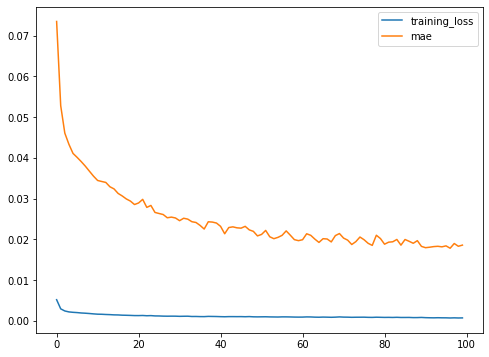

In [64]:
history = pd.DataFrame(model_adam.history.history)
plot_metrics(history, 100)

In [68]:
## generate forecast data

forecast_data = input_data[split_time-WINDOW_SIZE:-1]
predictions = prediction(model_adam, forecast_data, BATCH_SIZE, WINDOW_SIZE)

results = predictions.squeeze()
print(results.shape)

4/4 [==============================] - 2s 160ms/step
(500,)


## Evaluation Metrics

In [69]:
print('Mean Squared error :{}'.format(tf.metrics.mean_squared_error(true_values, results)))
print('Mean Absolute error :{}'.format(tf.metrics.mean_absolute_error(true_values, results)))

Mean Squared error :0.0017461057286709547
Mean Absolute error :0.028325585648417473


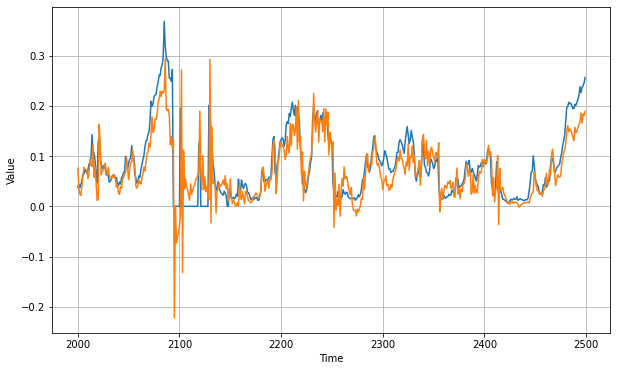

In [70]:
plot_series(valid_time, (true_values, results))

### With CNN and additional Dense

In [76]:
model_adam_2 = tf.keras.models.Sequential([
    
    #tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis = 0),  input_shape = [None, 2]),
    tf.keras.layers.Conv1D(64, 3, strides=1, padding='causal', activation='relu', input_shape= ([WINDOW_SIZE, 7])),
    tf.keras.layers.LSTM(64, return_sequences=True), #, input_shape = (WINDOW_SIZE, 7)),
    #tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_adam_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 96, 64)            1408      
                                                                 
 lstm_5 (LSTM)               (None, 96, 64)            33024     
                                                                 
 lstm_6 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 48)                3120      
                                                                 
 dense_5 (Dense)             (None, 24)                1176      
                                                                 
 dense_6 (Dense)             (None, 1)                 25        
                                                                 
Total params: 71,777
Trainable params: 71,777
Non-trai

In [77]:
# compile and fit the model
model_adam_2.compile(optimizer='adam',
                  loss=tf.keras.losses.Huber(),
                  metrics=['mae'])

model_adam_2.fit(train_dataset, epochs=num_epochs)

Epoch 1/100
15/15 [==============================] - 8s 258ms/step - loss: 0.0034 - mae: 0.0563
Epoch 2/100
15/15 [==============================] - 4s 252ms/step - loss: 0.0022 - mae: 0.0430
Epoch 3/100
15/15 [==============================] - 4s 273ms/step - loss: 0.0019 - mae: 0.0385
Epoch 4/100
15/15 [==============================] - 4s 270ms/step - loss: 0.0018 - mae: 0.0369
Epoch 5/100
15/15 [==============================] - 5s 301ms/step - loss: 0.0018 - mae: 0.0367
Epoch 6/100
15/15 [==============================] - 5s 278ms/step - loss: 0.0015 - mae: 0.0325
Epoch 7/100
15/15 [==============================] - 5s 284ms/step - loss: 0.0014 - mae: 0.0305
Epoch 8/100
15/15 [==============================] - 5s 291ms/step - loss: 0.0013 - mae: 0.0288
Epoch 9/100
15/15 [==============================] - 5s 294ms/step - loss: 0.0012 - mae: 0.0277
Epoch 10/100
15/15 [==============================] - 5s 302ms/step - loss: 0.0011 - mae: 0.0263
Epoch 11/100
15/15 [===================

15/15 [==============================] - 5s 312ms/step - loss: 4.4981e-04 - mae: 0.0166
Epoch 83/100
15/15 [==============================] - 5s 305ms/step - loss: 4.6591e-04 - mae: 0.0163
Epoch 84/100
15/15 [==============================] - 5s 312ms/step - loss: 4.3618e-04 - mae: 0.0162
Epoch 85/100
15/15 [==============================] - 5s 323ms/step - loss: 4.3076e-04 - mae: 0.0162
Epoch 86/100
15/15 [==============================] - 6s 348ms/step - loss: 4.5169e-04 - mae: 0.0169
Epoch 87/100
15/15 [==============================] - 6s 332ms/step - loss: 4.4998e-04 - mae: 0.0169
Epoch 88/100
15/15 [==============================] - 6s 364ms/step - loss: 4.3040e-04 - mae: 0.0166
Epoch 89/100
15/15 [==============================] - 5s 315ms/step - loss: 4.3129e-04 - mae: 0.0163
Epoch 90/100
15/15 [==============================] - 5s 318ms/step - loss: 4.2432e-04 - mae: 0.0164
Epoch 91/100
15/15 [==============================] - 5s 334ms/step - loss: 4.1420e-04 - mae: 0.0150
Epo

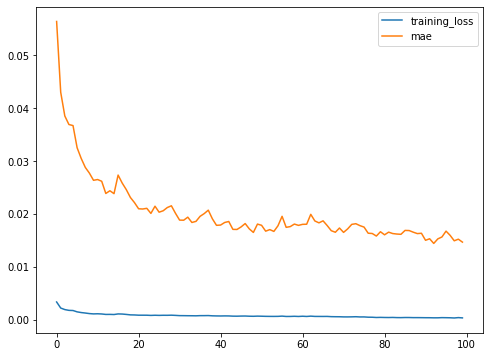

In [78]:
history = pd.DataFrame(model_adam_2.history.history)
plot_metrics(history, 100)

In [79]:
## generate forecast data

forecast_data = input_data[split_time-WINDOW_SIZE:-1]
predictions = prediction(model_adam_2, forecast_data, BATCH_SIZE, WINDOW_SIZE)

results = predictions.squeeze()
print(results.shape)

4/4 [==============================] - 1s 96ms/step
(500,)


## Evaluation Metrics

In [80]:
print('Mean Squared error :{}'.format(tf.metrics.mean_squared_error(true_values, results)))
print('Mean Absolute error :{}'.format(tf.metrics.mean_absolute_error(true_values, results)))

Mean Squared error :0.0015316862845793366
Mean Absolute error :0.026401840150356293


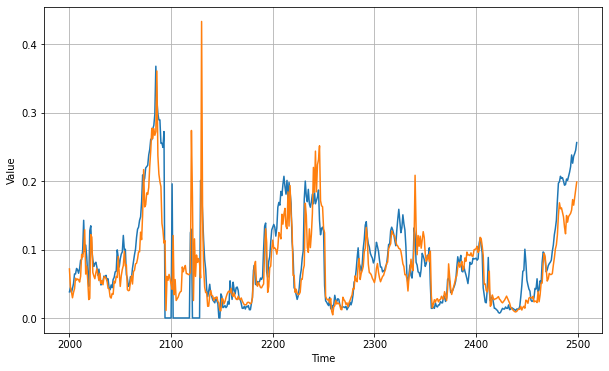

In [81]:
plot_series(valid_time, (true_values, results))